In [2]:
import activityio
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd

In [3]:
x = activityio.read("2020-11-19_113006.tcx") # TUO
y = activityio.read("1.fit") # Power meter
delta = pd.Timedelta(minutes=12, seconds=30)
y.index -= delta 
y = y[y.index > pd.Timedelta(0)]
y["sec_pwr"] = x["pwr"]

NameError: name 'Rider' is not defined

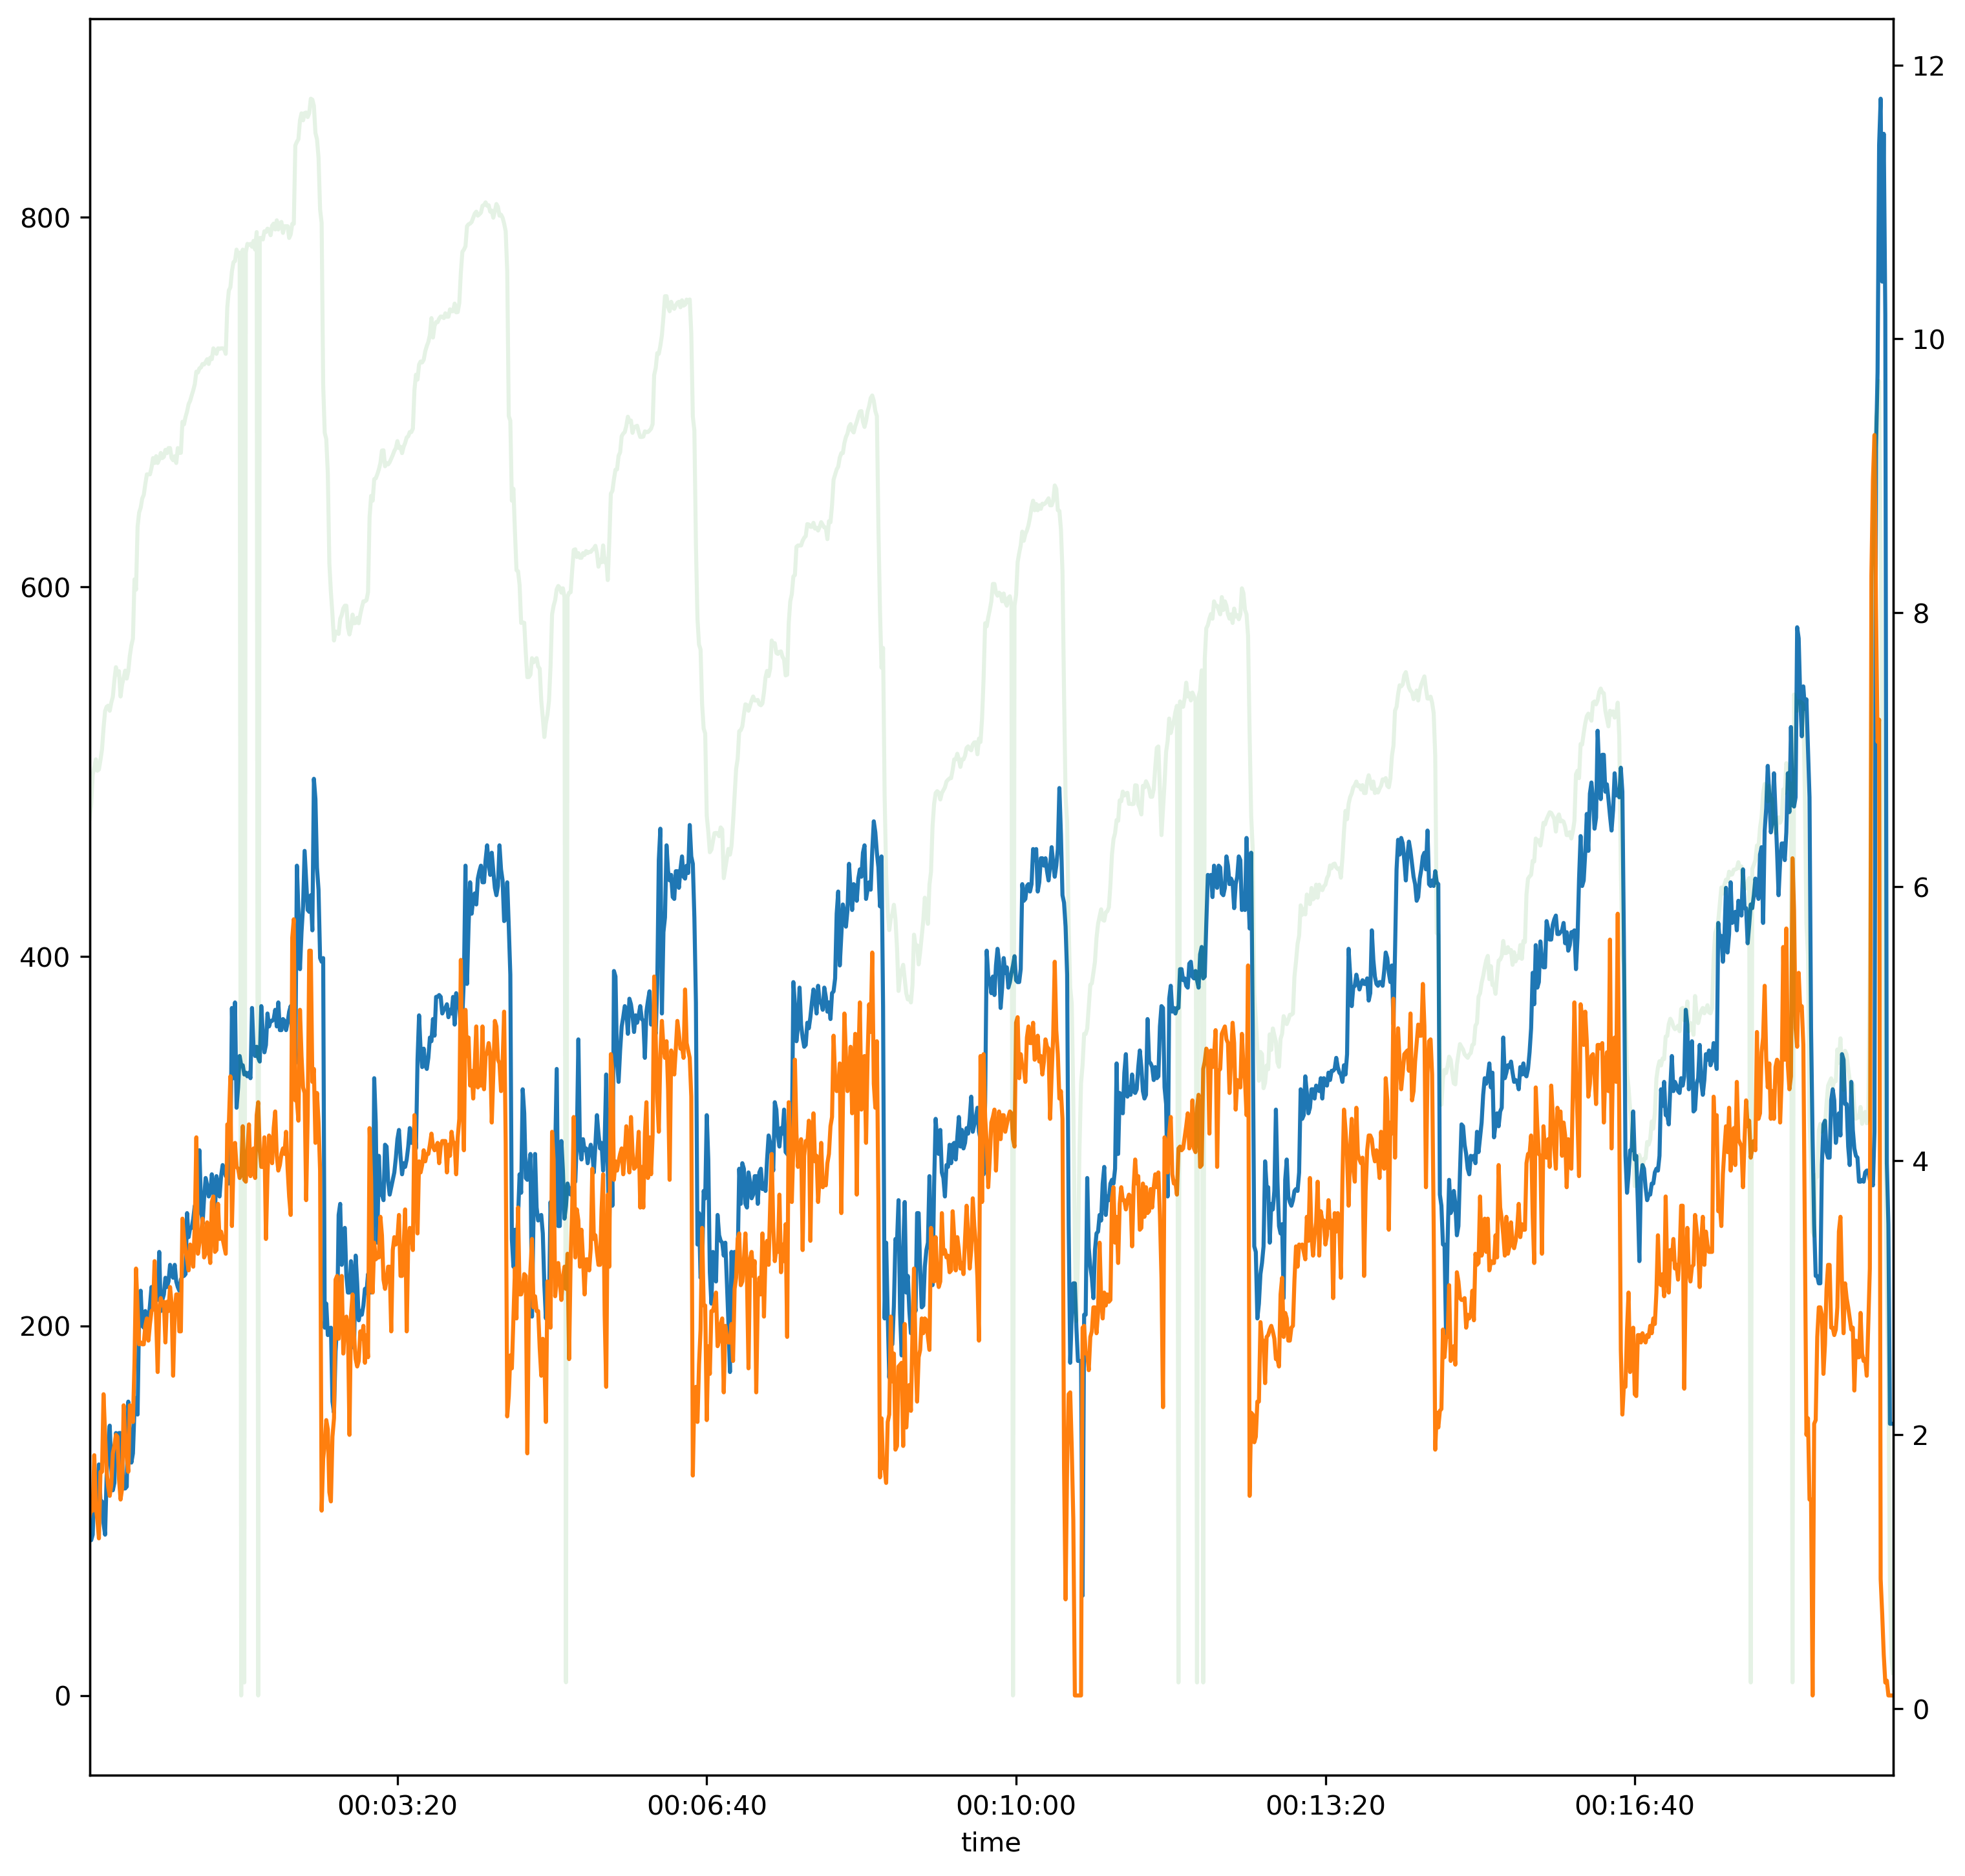

In [80]:
fig, ax1 = plt.subplots(figsize=(12,12), dpi= 300)
y["sec_pwr"].plot(ax=ax1)
y["pwr"].plot(ax=ax1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
y["speed"].plot(color='g', ax=ax2, alpha=0.1)

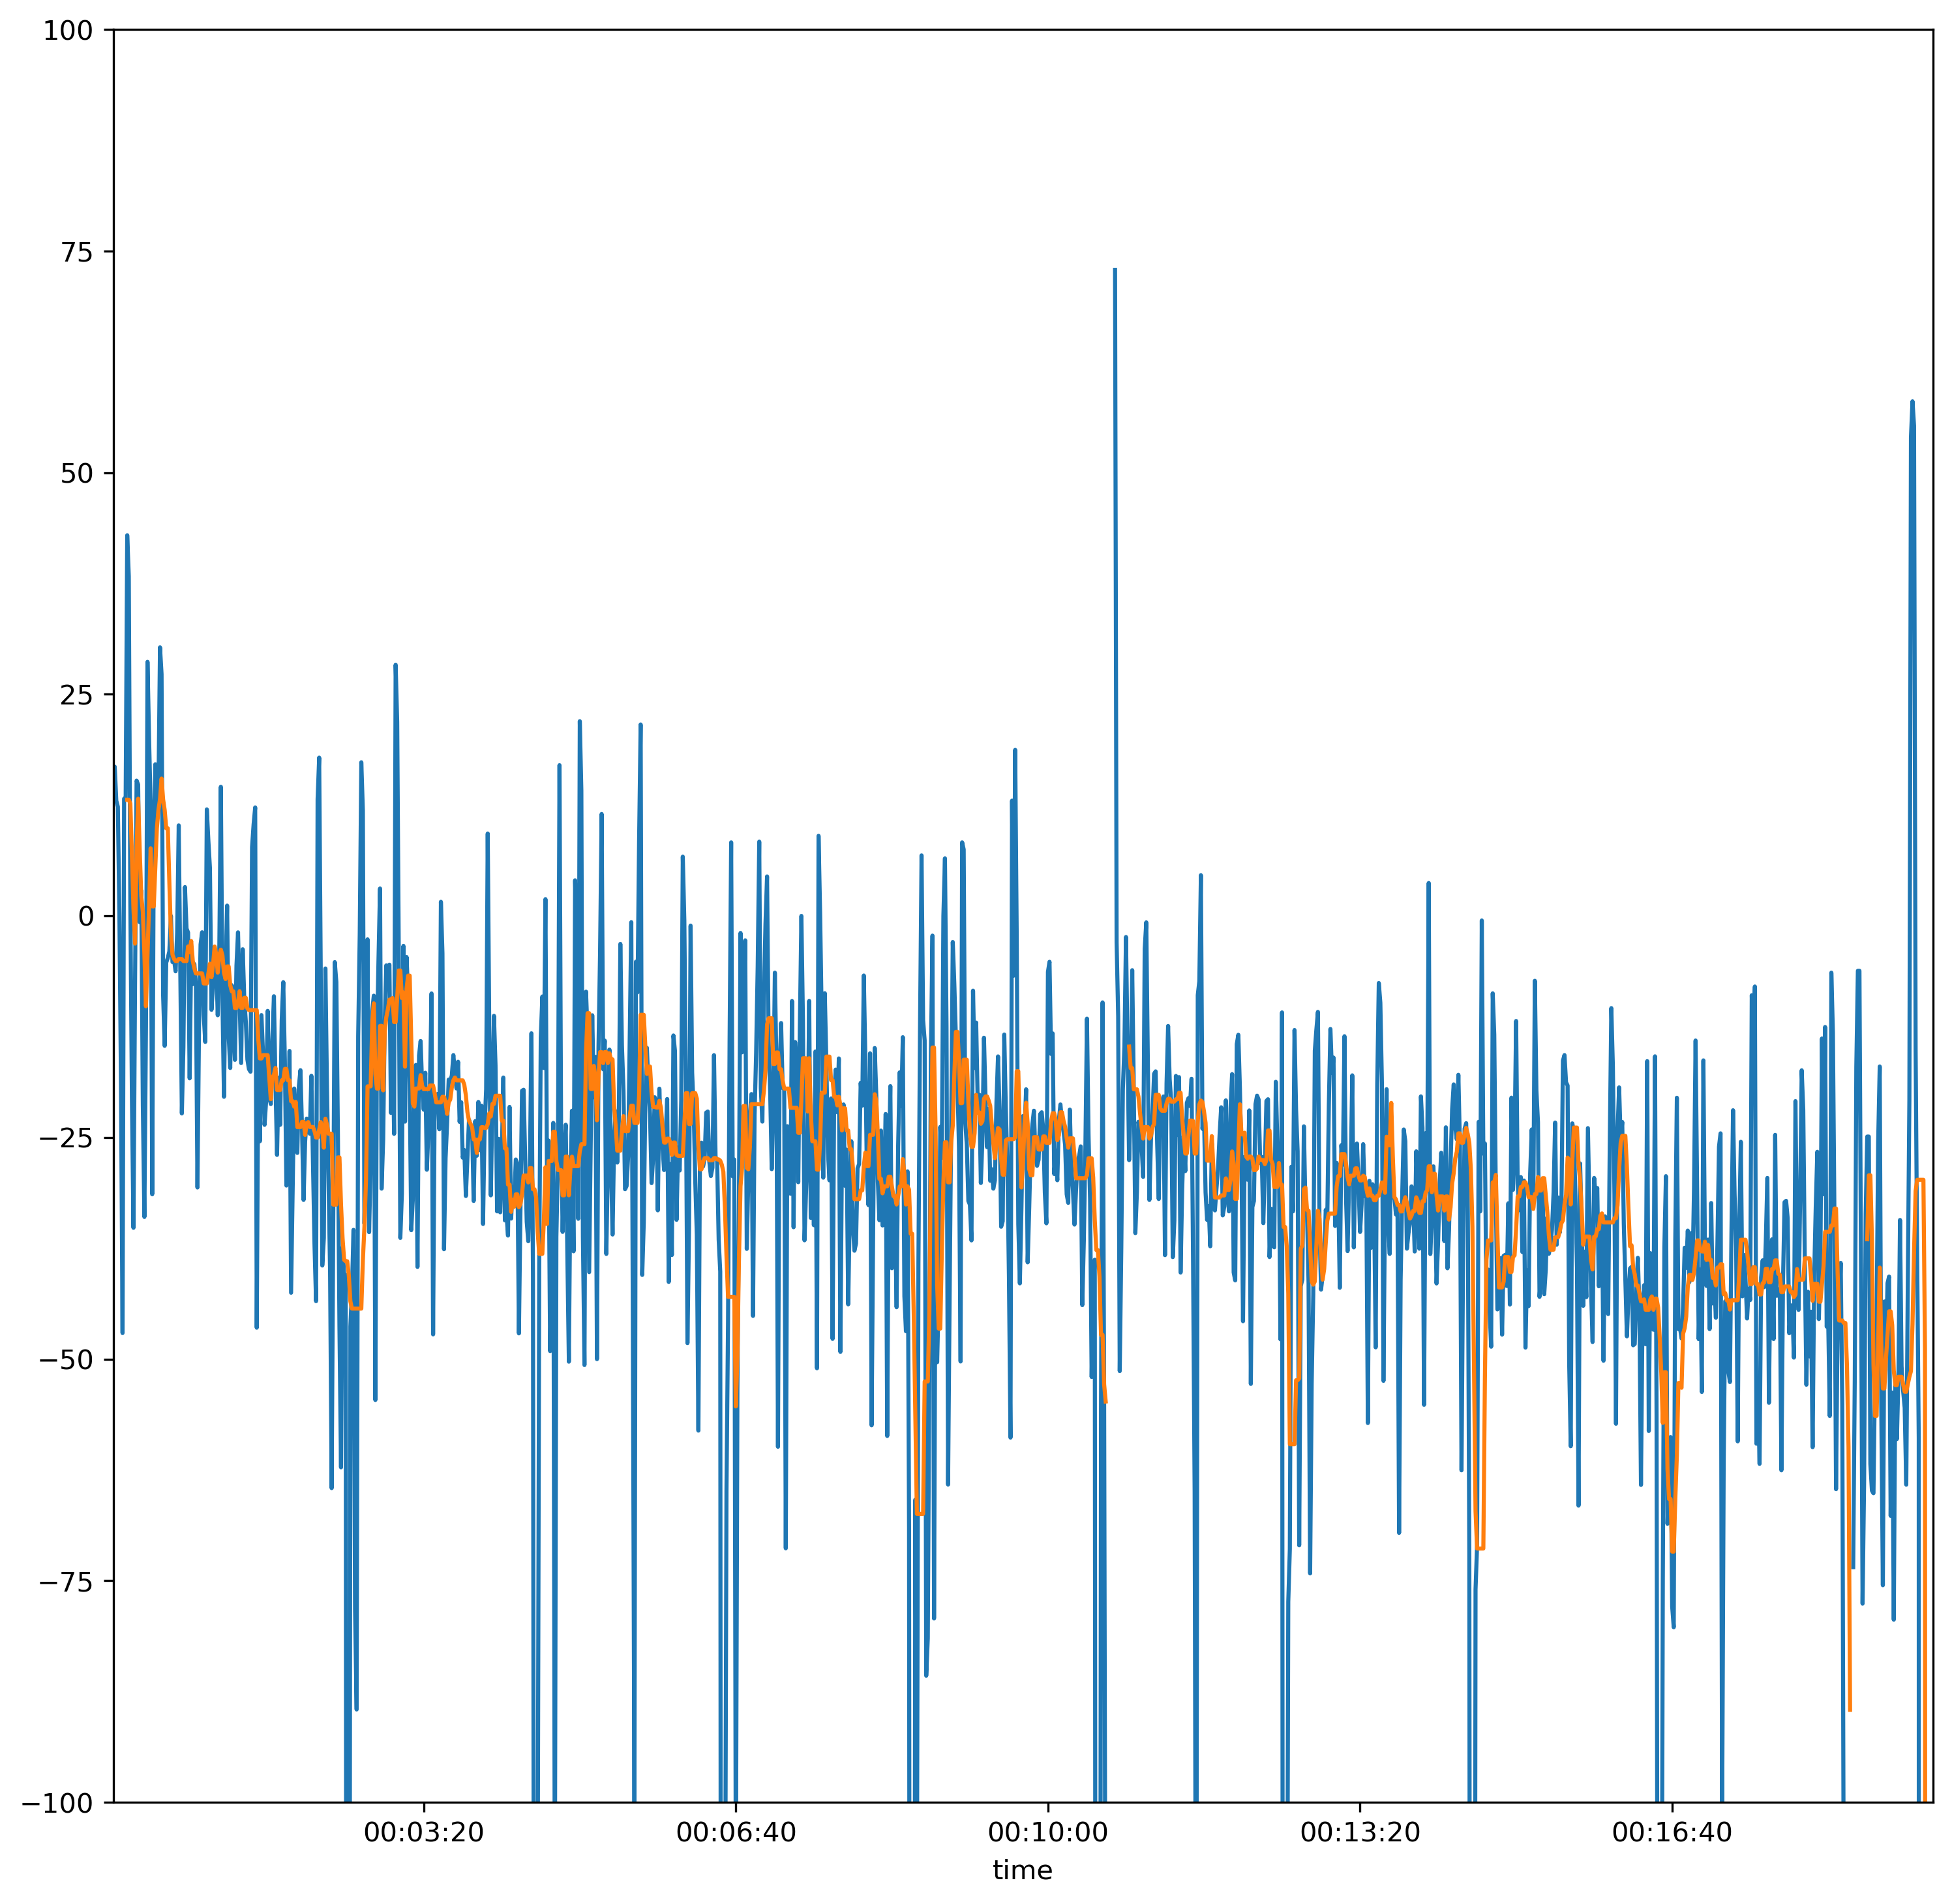

In [85]:
fig, ax1 = plt.subplots(figsize=(12,12), dpi= 300)
y["error_pct"] = (y["pwr"] - y["sec_pwr"]) / y["pwr"] * 100
z = y.rolling(10).median()
z["error_pct_3s"] = (z["pwr"] - z["sec_pwr"]) / z["pwr"] * 100
ax1.set_ylim([-100,100])
y["error_pct"].plot(ax=ax1)
z["error_pct"].plot(ax=ax1)

In [69]:
y

,left_right_balance,lap,alt,cad,dist,pwr,speed,sec_pwr,error_pct
time,,,,,,,,,
00:12:31,100,1,0.0,52.0,6144.41,97.0,6.499,84.0,0.134021
00:12:32,100,1,0.0,50.0,6150.97,101.0,6.605,84.0,0.168317
00:12:33,100,1,0.0,52.0,6157.69,100.0,6.819,87.0,0.130000
00:12:34,100,1,0.0,55.0,6164.55,130.0,6.871,114.0,0.123077
00:12:35,100,1,0.0,54.0,6171.46,102.0,6.930,102.0,0.000000
...,...,...,...,...,...,...,...,...,...
00:31:53,100,1,303.4,31.0,14789.70,8.0,3.027,288.0,-35.000000
00:31:54,100,1,303.6,31.0,14792.90,0.0,2.439,255.0,-inf
00:31:55,100,1,303.8,30.0,14794.80,0.0,0.921,147.0,-inf
